In [1]:
!unzip /content/sign_data.zip -d /content

Archive:  /content/sign_data.zip
   creating: /content/sign_data/
   creating: /content/sign_data/invalid/
  inflating: /content/sign_data/invalid/data (1).jpeg  
  inflating: /content/sign_data/invalid/data (1).png  
  inflating: /content/sign_data/invalid/data (10).png  
  inflating: /content/sign_data/invalid/data (11).png  
  inflating: /content/sign_data/invalid/data (12).png  
  inflating: /content/sign_data/invalid/data (13).png  
  inflating: /content/sign_data/invalid/data (14).png  
  inflating: /content/sign_data/invalid/data (15).png  
  inflating: /content/sign_data/invalid/data (16).png  
  inflating: /content/sign_data/invalid/data (17).png  
  inflating: /content/sign_data/invalid/data (18).png  
  inflating: /content/sign_data/invalid/data (2).jpeg  
  inflating: /content/sign_data/invalid/data (2).png  
  inflating: /content/sign_data/invalid/data (3).jpeg  
  inflating: /content/sign_data/invalid/data (3).png  
  inflating: /content/sign_data/invalid/data (4).jpeg  


In [6]:
!pip install -q bezier albumentations

In [8]:
!pip install -q -U albumentations

In [20]:
!pip install numpy==19

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==19 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 

In [9]:
import os
import random
import numpy as np
import bezier
import matplotlib.pyplot as plt

# Directories
reference_dir = "/content/sign_data/valid"  # Folder containing real signatures
output_dir = "/content/stroke_signatures"  # Output folder for generated signatures
os.makedirs(output_dir, exist_ok=True)

# Function to generate a smooth random stroke
def generate_random_stroke():
    """Create a smooth random stroke using Bezier curves."""
    num_points = random.randint(3, 6)  # Number of control points
    nodes = np.random.rand(2, num_points) * 300  # Randomized control points

    curve = bezier.Curve(nodes, degree=num_points-1)
    points = curve.evaluate_multi(np.linspace(0, 1, 100))

    return points

# Get all reference images in the directory
reference_files = [f for f in os.listdir(reference_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

# Generate synthetic signatures for each reference image
num_signatures_per_image = 5  # Number of synthetic variations per reference image
total_generated = 0

for ref_index, ref_image in enumerate(reference_files):
    for sig_index in range(num_signatures_per_image):
        plt.figure(figsize=(4, 2))

        # Generate multiple strokes for variation
        for _ in range(random.randint(3, 6)):  # Vary stroke count per signature
            points = generate_random_stroke()
            plt.plot(points[0], points[1], linewidth=2, color="black")

        plt.axis("off")

        # Save each generated signature
        filename = os.path.join(output_dir, f"synthetic_{ref_index+1}_{sig_index+1}.png")
        plt.savefig(filename, bbox_inches="tight", pad_inches=0, dpi=300)
        plt.close()

        total_generated += 1

print(f"Generated {total_generated} synthetic signatures from {len(reference_files)} reference images.")

Generated 105 synthetic signatures from 21 reference images.


In [1]:
import cv2
import albumentations as A
import numpy as np
import os
import matplotlib.pyplot as plt


# Input & Output Paths
input_dir = "/content/stroke_signatures"  # Change this to your input directory
output_dir = "/content/augmented_synthetic"
os.makedirs(output_dir, exist_ok=True)

# **Stronger Grid Distortion Variations**
grid_variations = [
    {"num_steps": 5, "distort_limit": 0.4},
    {"num_steps": 7, "distort_limit": 0.5},
    {"num_steps": 9, "distort_limit": 0.6},
    {"num_steps": 12, "distort_limit": 0.7},
]

# Final Combined Augmentation
combined_augmentation = A.Compose([
    A.MultiplicativeNoise(multiplier=(0.9, 1.1), p=1.0),
    A.MotionBlur(blur_limit=7, p=1.0),
    A.MedianBlur(blur_limit=7, p=1.0),
])

# Process each image in input directory
for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_dir, filename)
        image = cv2.imread(input_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply Grid Distortions
        for idx, params in enumerate(grid_variations):
            grid_distortion = A.GridDistortion(num_steps=params["num_steps"], distort_limit=params["distort_limit"], p=1.0)
            grid_augmented = grid_distortion(image=image)["image"]
            grid_filename = f"{filename.split('.')[0]}_grid_{idx+1}.png"
            cv2.imwrite(os.path.join(output_dir, grid_filename), cv2.cvtColor(grid_augmented, cv2.COLOR_RGB2BGR))
            print(f"Saved: {grid_filename}")

        # Apply Combined Augmentation
        combined_augmented = combined_augmentation(image=image)["image"]
        combined_filename = f"{filename.split('.')[0]}_combined.png"
        cv2.imwrite(os.path.join(output_dir, combined_filename), cv2.cvtColor(combined_augmented, cv2.COLOR_RGB2BGR))
        print(f"Saved: {combined_filename}")

print("Augmentation complete!")

Saved: synthetic_5_5_grid_1.png
Saved: synthetic_5_5_grid_2.png
Saved: synthetic_5_5_grid_3.png
Saved: synthetic_5_5_grid_4.png
Saved: synthetic_5_5_combined.png
Saved: synthetic_8_2_grid_1.png
Saved: synthetic_8_2_grid_2.png
Saved: synthetic_8_2_grid_3.png
Saved: synthetic_8_2_grid_4.png
Saved: synthetic_8_2_combined.png
Saved: synthetic_17_1_grid_1.png
Saved: synthetic_17_1_grid_2.png
Saved: synthetic_17_1_grid_3.png
Saved: synthetic_17_1_grid_4.png
Saved: synthetic_17_1_combined.png
Saved: synthetic_14_3_grid_1.png
Saved: synthetic_14_3_grid_2.png
Saved: synthetic_14_3_grid_3.png
Saved: synthetic_14_3_grid_4.png
Saved: synthetic_14_3_combined.png
Saved: synthetic_13_1_grid_1.png
Saved: synthetic_13_1_grid_2.png
Saved: synthetic_13_1_grid_3.png
Saved: synthetic_13_1_grid_4.png
Saved: synthetic_13_1_combined.png
Saved: synthetic_13_2_grid_1.png
Saved: synthetic_13_2_grid_2.png
Saved: synthetic_13_2_grid_3.png
Saved: synthetic_13_2_grid_4.png
Saved: synthetic_13_2_combined.png
Saved: s

In [5]:
import cv2
import albumentations as A
import numpy as np
import os
import matplotlib.pyplot as plt


# Input & Output Paths
input_dir = "/content/sign_data/valid"  # Change this to your input directory
output_dir = "/content/augmented_valid"
os.makedirs(output_dir, exist_ok=True)

# **Stronger Grid Distortion Variations**
grid_variations = [
    {"num_steps": 5, "distort_limit": 0.4},
    {"num_steps": 7, "distort_limit": 0.5},
    {"num_steps": 9, "distort_limit": 0.6},
    {"num_steps": 12, "distort_limit": 0.7},
]

# Final Combined Augmentation
combined_augmentation = A.Compose([
    A.MultiplicativeNoise(multiplier=(0.9, 1.1), p=1.0),
    A.MotionBlur(blur_limit=7, p=1.0),
    A.MedianBlur(blur_limit=7, p=1.0),
])

# Process each image in input directory
for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_dir, filename)
        image = cv2.imread(input_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply Grid Distortions
        for idx, params in enumerate(grid_variations):
            grid_distortion = A.GridDistortion(num_steps=params["num_steps"], distort_limit=params["distort_limit"], p=1.0)
            grid_augmented = grid_distortion(image=image)["image"]
            grid_filename = f"{filename.split('.')[0]}_grid_{idx+1}.png"
            cv2.imwrite(os.path.join(output_dir, grid_filename), cv2.cvtColor(grid_augmented, cv2.COLOR_RGB2BGR))
            print(f"Saved: {grid_filename}")

        # Apply Combined Augmentation
        combined_augmented = combined_augmentation(image=image)["image"]
        combined_filename = f"{filename.split('.')[0]}_combined.png"
        cv2.imwrite(os.path.join(output_dir, combined_filename), cv2.cvtColor(combined_augmented, cv2.COLOR_RGB2BGR))
        print(f"Saved: {combined_filename}")

print("Augmentation complete!")

Saved: data (2)_grid_1.png
Saved: data (2)_grid_2.png
Saved: data (2)_grid_3.png
Saved: data (2)_grid_4.png
Saved: data (2)_combined.png
Saved: data (14)_grid_1.png
Saved: data (14)_grid_2.png
Saved: data (14)_grid_3.png
Saved: data (14)_grid_4.png
Saved: data (14)_combined.png
Saved: data (10)_grid_1.png
Saved: data (10)_grid_2.png
Saved: data (10)_grid_3.png
Saved: data (10)_grid_4.png
Saved: data (10)_combined.png
Saved: data (9)_grid_1.png
Saved: data (9)_grid_2.png
Saved: data (9)_grid_3.png
Saved: data (9)_grid_4.png
Saved: data (9)_combined.png
Saved: data (21)_grid_1.png
Saved: data (21)_grid_2.png
Saved: data (21)_grid_3.png
Saved: data (21)_grid_4.png
Saved: data (21)_combined.png
Saved: data (5)_grid_1.png
Saved: data (5)_grid_2.png
Saved: data (5)_grid_3.png
Saved: data (5)_grid_4.png
Saved: data (5)_combined.png
Saved: data (17)_grid_1.png
Saved: data (17)_grid_2.png
Saved: data (17)_grid_3.png
Saved: data (17)_grid_4.png
Saved: data (17)_combined.png
Saved: data (20)_grid

In [3]:
!cp -r /content/augmented_synthetic/* /content/valid_signatures/

In [6]:
!cp -r /content/augmented_valid/* /content/valid_signatures/

In [7]:
# !zip -r data.zip /content/valid_signatures

In [9]:
import numpy as np
import cv2
import os
import random
from scipy import ndimage
import albumentations as A
from skimage import transform, exposure

class SignatureDataGenerator:
    def __init__(self, input_shape=(224, 224)):
        self.input_shape = input_shape
        # Modified augmentation pipeline to work with grayscale images
        self.augmentation = A.Compose([
            A.OneOf([
                A.MultiplicativeNoise(p=1.0),
            ], p=0.5),
            A.OneOf([
                A.MotionBlur(blur_limit=7, p=1.0),
                A.MedianBlur(blur_limit=7, p=1.0),
                A.GaussianBlur(blur_limit=7, p=1.0),
            ], p=0.5),
            A.OneOf([
                A.OpticalDistortion(p=1.0),
                A.GridDistortion(p=1.0),
                A.ElasticTransform(p=1.0),
            ], p=0.5),
        ])

    def augment_signature(self, image):
        """Apply augmentation to signature image"""
        # Convert to RGB for augmentations that require it
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        augmented = self.augmentation(image=image_rgb)
        # Convert back to grayscale
        return cv2.cvtColor(augmented['image'], cv2.COLOR_RGB2GRAY)

    def generate_invalid_signatures(self, num_samples, save_dir):
        """Generate diverse invalid signatures"""
        os.makedirs(save_dir, exist_ok=True)

        for i in range(num_samples):
            try:
                canvas = np.zeros(self.input_shape, dtype=np.uint8)

                method = np.random.choice([
                    'random_lines', 'geometric_shapes', 'text_like',
                    'waves', 'circles', 'composite'
                ])

                if method == 'random_lines':
                    self._generate_random_lines(canvas)
                elif method == 'geometric_shapes':
                    self._generate_geometric_shapes(canvas)
                elif method == 'text_like':
                    self._generate_text_like(canvas)
                elif method == 'waves':
                    self._generate_waves(canvas)
                elif method == 'circles':
                    self._generate_circles(canvas)
                else:
                    self._generate_composite(canvas)

                # Apply augmentation to invalid signatures as well
                # canvas = self.augment_signature(canvas)
                # canvas = self._apply_transformations(canvas)

                if canvas is not None and canvas.size > 0:
                    canvas = cv2.bitwise_not(canvas)  # Inverts black/white pixels
                    output_path = os.path.join(save_dir, f'invalid_{i}.png')
                    cv2.imwrite(output_path, canvas)
                else:
                    print(f"Error: Invalid canvas for sample {i}")
            except Exception as e:
                print(f"Error generating invalid sample {i}: {str(e)}")
                continue



    def _generate_random_lines(self, canvas):
        """Generate random connected lines"""
        num_points = np.random.randint(5, 15)
        points = np.random.randint(0, min(self.input_shape), (num_points, 2))

        for i in range(len(points) - 1):
            thickness = np.random.randint(1, 4)
            pt1 = tuple(map(int, points[i]))
            pt2 = tuple(map(int, points[i+1]))
            cv2.line(canvas, pt1, pt2, 255, thickness)

    def _generate_geometric_shapes(self, canvas):
        """Generate various geometric shapes"""
        shapes = ['rectangle', 'triangle', 'circle']
        num_shapes = np.random.randint(2, 5)

        for _ in range(num_shapes):
            shape = random.choice(shapes)
            center = np.random.randint(30, min(self.input_shape) - 30, 2)
            size = np.random.randint(20, 50)

            if shape == 'rectangle':
                pt1 = (center[0] - size, center[1] - size)
                pt2 = (center[0] + size, center[1] + size)
                cv2.rectangle(canvas, pt1, pt2, 255, np.random.randint(1, 4))
            elif shape == 'triangle':
                points = np.array([
                    [center[0], center[1] - size],
                    [center[0] - size, center[1] + size],
                    [center[0] + size, center[1] + size]
                ], np.int32)
                cv2.polylines(canvas, [points], True, 255, np.random.randint(1, 4))
            else:
                cv2.circle(canvas, tuple(center), size, 255, np.random.randint(1, 4))

    def _generate_text_like(self, canvas):
        """Generate text-like patterns"""
        num_chars = np.random.randint(3, 8)
        x_pos = 30

        for _ in range(num_chars):
            height = np.random.randint(20, 40)
            strokes = np.random.randint(2, 5)

            for _ in range(strokes):
                start_y = np.random.randint(30, self.input_shape[0] - 30)
                end_y = start_y + np.random.randint(-height, height)

                cv2.line(canvas,
                        (x_pos, start_y),
                        (x_pos + np.random.randint(5, 15), end_y),
                        255,
                        np.random.randint(1, 3))

            x_pos += np.random.randint(15, 30)

    def _generate_waves(self, canvas):
        """Generate wave-like patterns"""
        x = np.arange(0, self.input_shape[1], 1)
        num_waves = np.random.randint(2, 5)

        for _ in range(num_waves):
            amplitude = np.random.randint(10, 30)
            frequency = np.random.random() * 0.1
            phase = np.random.random() * 2 * np.pi

            y = amplitude * np.sin(2 * np.pi * frequency * x + phase)
            y += self.input_shape[0] // 2

            points = np.column_stack((x, y.astype(int)))
            cv2.polylines(canvas, [points.reshape((-1, 1, 2))], False, 255, np.random.randint(1, 4))

    def _generate_circles(self, canvas):
        """Generate overlapping circles"""
        num_circles = np.random.randint(3, 8)

        for _ in range(num_circles):
            center = (np.random.randint(0, self.input_shape[1]),
                     np.random.randint(0, self.input_shape[0]))
            radius = np.random.randint(10, 40)
            cv2.circle(canvas, center, radius, 255, np.random.randint(1, 3))

    def _generate_composite(self, canvas):
        """Generate composite of multiple patterns"""
        methods = [self._generate_random_lines,
                  self._generate_geometric_shapes,
                  self._generate_waves,
                  self._generate_circles]

        num_patterns = np.random.randint(2, 4)
        selected_methods = random.sample(methods, num_patterns)

        for method in selected_methods:
            method(canvas)

    def _apply_transformations(self, canvas):
        """Apply various transformations to make synthetic data more realistic"""
        try:
            # Add noise
            noise = np.random.normal(0, 25, canvas.shape).astype(np.uint8)
            canvas = cv2.add(canvas, noise)

            # Random rotation
            angle = np.random.uniform(-20, 20)
            matrix = cv2.getRotationMatrix2D(
                (canvas.shape[1]/2, canvas.shape[0]/2),
                angle,
                1.0
            )
            canvas = cv2.warpAffine(canvas, matrix, (canvas.shape[1], canvas.shape[0]))

            # Adjust contrast
            canvas = exposure.adjust_gamma(canvas, np.random.uniform(0.8, 1.2))

            return (canvas * 255).astype(np.uint8)

        except Exception as e:
            print(f"Error in _apply_transformations: {str(e)}")
            return None

generator = SignatureDataGenerator()
generator.generate_invalid_signatures(
        num_samples=1000,
        save_dir="/content/invalid_signatures"
    )

In [11]:
#!rm -rf /content/invalid_signatures1

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, Model, metrics, regularizers
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import ssim
import json
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import seaborn as sns
from datetime import datetime
from tensorflow.keras.utils import register_keras_serializable


def create_save_directory():
    """Create a timestamped directory for saving model artifacts"""
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    save_dir = f'signature_model_{timestamp}'
    os.makedirs(save_dir, exist_ok=True)
    return save_dir

def preprocess_signature(image, target_size=(224, 224)):
    """Enhanced preprocessing function with additional image processing"""
    try:
        if isinstance(image, str):
            img = cv2.imread(image)
            if img is None:
                return None
        else:
            img = image.copy()

        # Convert to grayscale
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Enhance contrast
        img = cv2.equalizeHist(img)

        # Remove noise
        img = cv2.GaussianBlur(img, (3, 3), 0)

        # Adaptive thresholding for better stroke detection
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)

        # Remove small noise components
        kernel = np.ones((2,2), np.uint8)
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

        # Resize
        img = cv2.resize(img, target_size)

        # Normalize
        img = img.astype(np.float32) / 255.0

        # Add channel dimension
        img = np.expand_dims(img, axis=-1)

        return img

    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None

class SignatureVerificationSystem:
    def __init__(self, input_shape=(224, 224, 1), latent_dim=128):
        self.input_shape = input_shape
        self.latent_dim = latent_dim
        # Calculate required shapes for proper reconstruction
        self.conv_shape = (input_shape[0] // 16, input_shape[1] // 16, 256)  # After 4 max pooling layers
        self.encoder, self.decoder, self.autoencoder = self._build_autoencoder()
        self.classifier = self._build_classifier()
        self.anomaly_detector = None
        self.reconstruction_threshold = None
        self.metrics_history = {}
        self.save_dir = create_save_directory()

    def _build_autoencoder(self):
        # Encoder
        encoder_input = layers.Input(shape=self.input_shape)

        # Encoder blocks with shape tracking
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                         kernel_regularizer=regularizers.l2(1e-4))(encoder_input)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 112x112x32
        x = layers.Dropout(0.2)(x)

        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                         kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 56x56x64
        x = layers.Dropout(0.2)(x)

        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                         kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 28x28x128
        x = layers.Dropout(0.2)(x)

        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                         kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 14x14x256

        # Flatten and encode to latent space
        x = layers.Flatten()(x)
        encoded = layers.Dense(self.latent_dim, activation='relu',
                             kernel_regularizer=regularizers.l2(1e-4))(x)

        # Decoder
        decoder_input = layers.Input(shape=(self.latent_dim,))

        # Calculate the shape for reshaping
        units = self.conv_shape[0] * self.conv_shape[1] * self.conv_shape[2]

        x = layers.Dense(units, activation='relu')(decoder_input)
        x = layers.Reshape(self.conv_shape)(x)  # Reshape to match the encoder's last conv shape

        x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same',
                                 kernel_regularizer=regularizers.l2(1e-4))(x)  # 28x28x128
        x = layers.BatchNormalization()(x)

        x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same',
                                 kernel_regularizer=regularizers.l2(1e-4))(x)  # 56x56x64
        x = layers.BatchNormalization()(x)

        x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same',
                                 kernel_regularizer=regularizers.l2(1e-4))(x)  # 112x112x32
        x = layers.BatchNormalization()(x)

        x = layers.Conv2DTranspose(1, (3, 3), strides=2, activation='sigmoid', padding='same')(x)  # 224x224x1

        # Create models
        encoder = Model(encoder_input, encoded, name='encoder')
        decoder = Model(decoder_input, x, name='decoder')
        autoencoder = Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')

        # Custom loss combining reconstruction and SSIM
        @register_keras_serializable()
        def combined_loss(y_true, y_pred):
            reconstruction_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
            ssim_loss = 1 - tf.reduce_mean(ssim(y_true, y_pred, max_val=1.0))
            return 0.7 * reconstruction_loss + 0.3 * ssim_loss

        autoencoder.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            loss=combined_loss,
            metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.AUC()]
        )

        return encoder, decoder, autoencoder

    def _build_classifier(self):
        """Build secondary CNN classifier for valid/invalid signatures"""
        model = tf.keras.Sequential([
            layers.Input(shape=self.input_shape),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

    def prepare_data(self, valid_dir, invalid_dir):
        """Prepare and augment training data with progress tracking"""
        print("Preparing training data...")

        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=False,
            fill_mode='nearest',
            validation_split=0.2
        )

        # Load and preprocess valid signatures
        valid_signatures = []
        total_valid = len(os.listdir(valid_dir))
        print(f"Processing {total_valid} valid signatures...")

        for i, img_path in enumerate(os.listdir(valid_dir)):
            if i % 100 == 0:
                print(f"Processed {i}/{total_valid} valid signatures")
            img = preprocess_signature(os.path.join(valid_dir, img_path))
            if img is not None:
                valid_signatures.append(img)

        # Load and preprocess invalid signatures
        invalid_signatures = []
        total_invalid = len(os.listdir(invalid_dir))
        print(f"Processing {total_invalid} invalid signatures...")

        for i, img_path in enumerate(os.listdir(invalid_dir)):
            if i % 100 == 0:
                print(f"Processed {i}/{total_invalid} invalid signatures")
            img = preprocess_signature(os.path.join(invalid_dir, img_path))
            if img is not None:
                invalid_signatures.append(img)

        X_valid = np.array(valid_signatures)
        X_invalid = np.array(invalid_signatures)

        print(f"Final dataset sizes - Valid: {len(X_valid)}, Invalid: {len(X_invalid)}")
        return X_valid, X_invalid, datagen

    def train(self, valid_dir, invalid_dir, epochs=30, batch_size=32):
        """Enhanced training function with comprehensive logging"""
        print("Starting training process...")
        X_valid, X_invalid, datagen = self.prepare_data(valid_dir, invalid_dir)

        # Train autoencoder
        print("Training autoencoder...")
        history_auto = self.autoencoder.fit(
            datagen.flow(X_valid, X_valid, batch_size=batch_size),
            epochs=50,
            validation_data=datagen.flow(
                X_valid, X_valid, batch_size=batch_size, subset='validation'),
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6),
                ModelCheckpoint(
                    os.path.join(self.save_dir, 'best_autoencoder.keras'),
                    monitor='val_loss',
                    save_best_only=True
                )
            ]
        )

        # Train anomaly detector
        print("Training anomaly detector...")
        latent_valid = self.encoder.predict(X_valid)
        self.anomaly_detector = IsolationForest(contamination=0.1, random_state=42)
        self.anomaly_detector.fit(latent_valid)

        # Prepare classifier data
        print("Training classifier...")
        X_combined = np.concatenate([X_valid, X_invalid])
        y_combined = np.concatenate([np.ones(len(X_valid)), np.zeros(len(X_invalid))])

        # Train classifier
        history_class = self.classifier.fit(
            X_combined, y_combined,
            batch_size=batch_size,
            epochs=3,
            validation_split=0.2,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                ModelCheckpoint(
                    os.path.join(self.save_dir, 'best_classifier.keras'),
                    monitor='val_loss',
                    save_best_only=True
                )
            ]
        )

        # Store metrics
        self.metrics_history = {
            'autoencoder': history_auto.history,
            'classifier': history_class.history
        }

        # Calculate thresholds
        print("Calculating decision thresholds...")
        reconstructions = self.autoencoder.predict(X_valid)
        reconstruction_errors = np.mean(np.square(X_valid - reconstructions), axis=(1,2,3))
        self.reconstruction_threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

        # Save everything
        self.save_model()

        # Plot and save metrics
        self.plot_training_metrics()
        # self.evaluate_system(X_valid, X_invalid)

        return self.metrics_history

    def plot_training_metrics(self):
        """Enhanced plotting function with additional metrics"""
        print("Plotting training metrics...")

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(3, 2)

        # Autoencoder loss
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(self.metrics_history['autoencoder']['loss'], label='Training Loss')
        ax1.plot(self.metrics_history['autoencoder']['val_loss'], label='Validation Loss')
        ax1.set_title('Autoencoder Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()

        # Classifier accuracy
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(self.metrics_history['classifier']['accuracy'], label='Training Accuracy')
        ax2.plot(self.metrics_history['classifier']['val_accuracy'], label='Validation Accuracy')
        ax2.set_title('Classifier Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()

        # Autoencoder metrics
        ax3 = fig.add_subplot(gs[1, 0])
        metrics_to_plot = ['precision', 'recall', 'auc']
        for metric in metrics_to_plot:
            ax3.plot(self.metrics_history['autoencoder'][metric], label=f'Training {metric}')
            ax3.plot(self.metrics_history['autoencoder'][f'val_{metric}'], label=f'Validation {metric}')
        ax3.set_title('Autoencoder Metrics')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Score')
        ax3.legend()

        # Save plot
        plt.tight_layout()
        plt.savefig(os.path.join(self.save_dir, 'training_metrics.png'))
        plt.close()

    def verify_signature(self, signature_img):
        """Verify a signature using multiple criteria"""
        processed_img = preprocess_signature(signature_img)
        if processed_img is None:
            return False, "Error processing image"

        # Get reconstruction and latent representation
        reconstruction = self.autoencoder.predict(np.array([processed_img]))
        latent_repr = self.encoder.predict(np.array([processed_img]))

        # Calculate reconstruction error
        recon_error = np.mean(np.square(processed_img - reconstruction[0]))

        # Get anomaly score
        anomaly_score = self.anomaly_detector.score_samples([latent_repr[0]])[0]

        # Get classifier prediction
        classifier_pred = self.classifier.predict(np.array([processed_img]))[0][0]

        # Combine criteria for final decision
        is_valid = (
            recon_error <= self.reconstruction_threshold and
            anomaly_score >= -0.5 and
            classifier_pred >= 0.5)

        return is_valid, {
            'reconstruction_error': float(recon_error),
            'anomaly_score': float(anomaly_score),
            'classifier_confidence': float(classifier_pred)
        }

    def evaluate_system(self, X_valid, X_invalid):
        """Comprehensive system evaluation"""
        print("Evaluating system performance...")

        # Prepare evaluation data
        X_combined = np.concatenate([X_valid, X_invalid])
        y_true = np.concatenate([np.ones(len(X_valid)), np.zeros(len(X_invalid))])

        # Get predictions
        y_pred = []
        for img in X_combined:
            is_valid, _ = self.verify_signature(img)
            y_pred.append(1 if is_valid else 0)

        # Calculate confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig(os.path.join(self.save_dir, 'confusion_matrix.png'))
        plt.close()

        # Calculate and save metrics
        precision = cm[1,1] / (cm[1,1] + cm[0,1])
        recall = cm[1,1] / (cm[1,1] + cm[1,0])
        f1_score = 2 * (precision * recall) / (precision + recall)

        evaluation_metrics = {
            'precision': float(precision),
            'recall': float(recall),
            'f1_score': float(f1_score),
            'confusion_matrix': cm.tolist()
        }

        with open(os.path.join(self.save_dir, 'evaluation_metrics.json'), 'w') as f:
            json.dump(evaluation_metrics, f, indent=4)

        print("\nEvaluation Metrics:")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1_score:.4f}")

    def save_model(self):
        """Save all model components and parameters"""
        print(f"Saving model components to {self.save_dir}...")

        # Save neural network models
        self.autoencoder.save(os.path.join(self.save_dir, 'autoencoder.keras'))
        self.encoder.save(os.path.join(self.save_dir, 'encoder.keras'))
        self.decoder.save(os.path.join(self.save_dir, 'decoder.keras'))
        self.classifier.save(os.path.join(self.save_dir, 'classifier.keras'))

        # Save anomaly detector
        import joblib
        joblib.dump(self.anomaly_detector, os.path.join(self.save_dir, 'anomaly_detector.joblib'))

        # Save thresholds and parameters
        params = {
            'reconstruction_threshold': float(self.reconstruction_threshold),
            'input_shape': self.input_shape,
            'latent_dim': self.latent_dim
        }

        with open(os.path.join(self.save_dir, 'parameters.json'), 'w') as f:
            json.dump(params, f, indent=4)

        # Save threshold and metrics
        np.save(os.path.join(self.save_dir, 'reconstruction_threshold.npy'),
                self.reconstruction_threshold)

        with open(os.path.join(self.save_dir, 'metrics_history.json'), 'w') as f:
            json.dump(self.metrics_history, f)

        print("Model saved successfully!")

    @classmethod
    def load_model(cls, model_dir):
        """Load a saved model"""
        print(f"Loading model from {model_dir}...")

        # Load parameters
        with open(os.path.join(model_dir, 'parameters.json'), 'r') as f:
            params = json.load(f)

        # Initialize model with saved parameters
        model = cls(input_shape=tuple(params['input_shape']),
                   latent_dim=params['latent_dim'])

        # Load neural network models
        model.autoencoder = tf.keras.models.load_model(os.path.join(model_dir, 'autoencoder.keras'))
        model.encoder = tf.keras.models.load_model(os.path.join(model_dir, 'encoder.keras'))
        model.decoder = tf.keras.models.load_model(os.path.join(model_dir, 'decoder.keras'))
        model.classifier = tf.keras.models.load_model(os.path.join(model_dir, 'classifier.keras'))

        # Load anomaly detector
        import joblib
        model.anomaly_detector = joblib.load(os.path.join(model_dir, 'anomaly_detector.joblib'))

        # Load threshold
        model.reconstruction_threshold = params['reconstruction_threshold']

        print("Model loaded successfully!")
        return model

def main():
    """Main function to demonstrate usage"""
    # Set paths
    valid_dir = "/content/valid_signatures"
    invalid_dir = "/content/invalid_signatures"

    # Initialize and train model
    model = SignatureVerificationSystem()
    model.train(valid_dir, invalid_dir, epochs=30, batch_size=32)

if __name__ == "__main__":
    main()

    # Example of loading a saved model
    # loaded_model = SignatureVerificationSystem.load_model("path/to/saved/model")

    # Example of verifying a signature
    # is_valid, details = model.verify_signature("path/to/test/signature.png")

Starting training process...
Preparing training data...
Processing 630 valid signatures...
Processed 0/630 valid signatures
Processed 100/630 valid signatures
Processed 200/630 valid signatures
Processed 300/630 valid signatures
Processed 400/630 valid signatures
Processed 500/630 valid signatures
Processed 600/630 valid signatures
Processing 1000 invalid signatures...
Processed 0/1000 invalid signatures
Processed 100/1000 invalid signatures
Processed 200/1000 invalid signatures
Processed 300/1000 invalid signatures
Processed 400/1000 invalid signatures
Processed 500/1000 invalid signatures
Processed 600/1000 invalid signatures
Processed 700/1000 invalid signatures
Processed 800/1000 invalid signatures
Processed 900/1000 invalid signatures
Final dataset sizes - Valid: 630, Invalid: 1000
Training autoencoder...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5091 - auc: 0.5199 - loss: 0.8958 - precision: 0.0879 - recall: 0.5069 - val_accuracy: 0.6718 - val_auc: 0.5015 - val_loss: 0.8622 - val_precision: 0.0854 - val_recall: 0.2870 - learning_rate: 1.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.5417 - auc: 0.5797 - loss: 0.8668 - precision: 0.1033 - recall: 0.5581 - val_accuracy: 0.8033 - val_auc: 0.5014 - val_loss: 0.8513 - val_precision: 0.0843 - val_recall: 0.1300 - learning_rate: 1.0000e-04
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.5666 - auc: 0.6164 - loss: 0.8541 - precision: 0.1129 - recall: 0.5871 - val_accuracy: 0.8271 - val_auc: 0.5014 - val_loss: 0.8399 - val_precision: 0.0852 - val_recall: 0.1036 - learning_rate: 1.0000e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.5884 - auc: 0.6392 - loss: 0.8437 - precision: 0.1213 - recall: 0.5990 - val_accuracy: 0.8572 - val_auc: 0.5008 - val_loss: 0

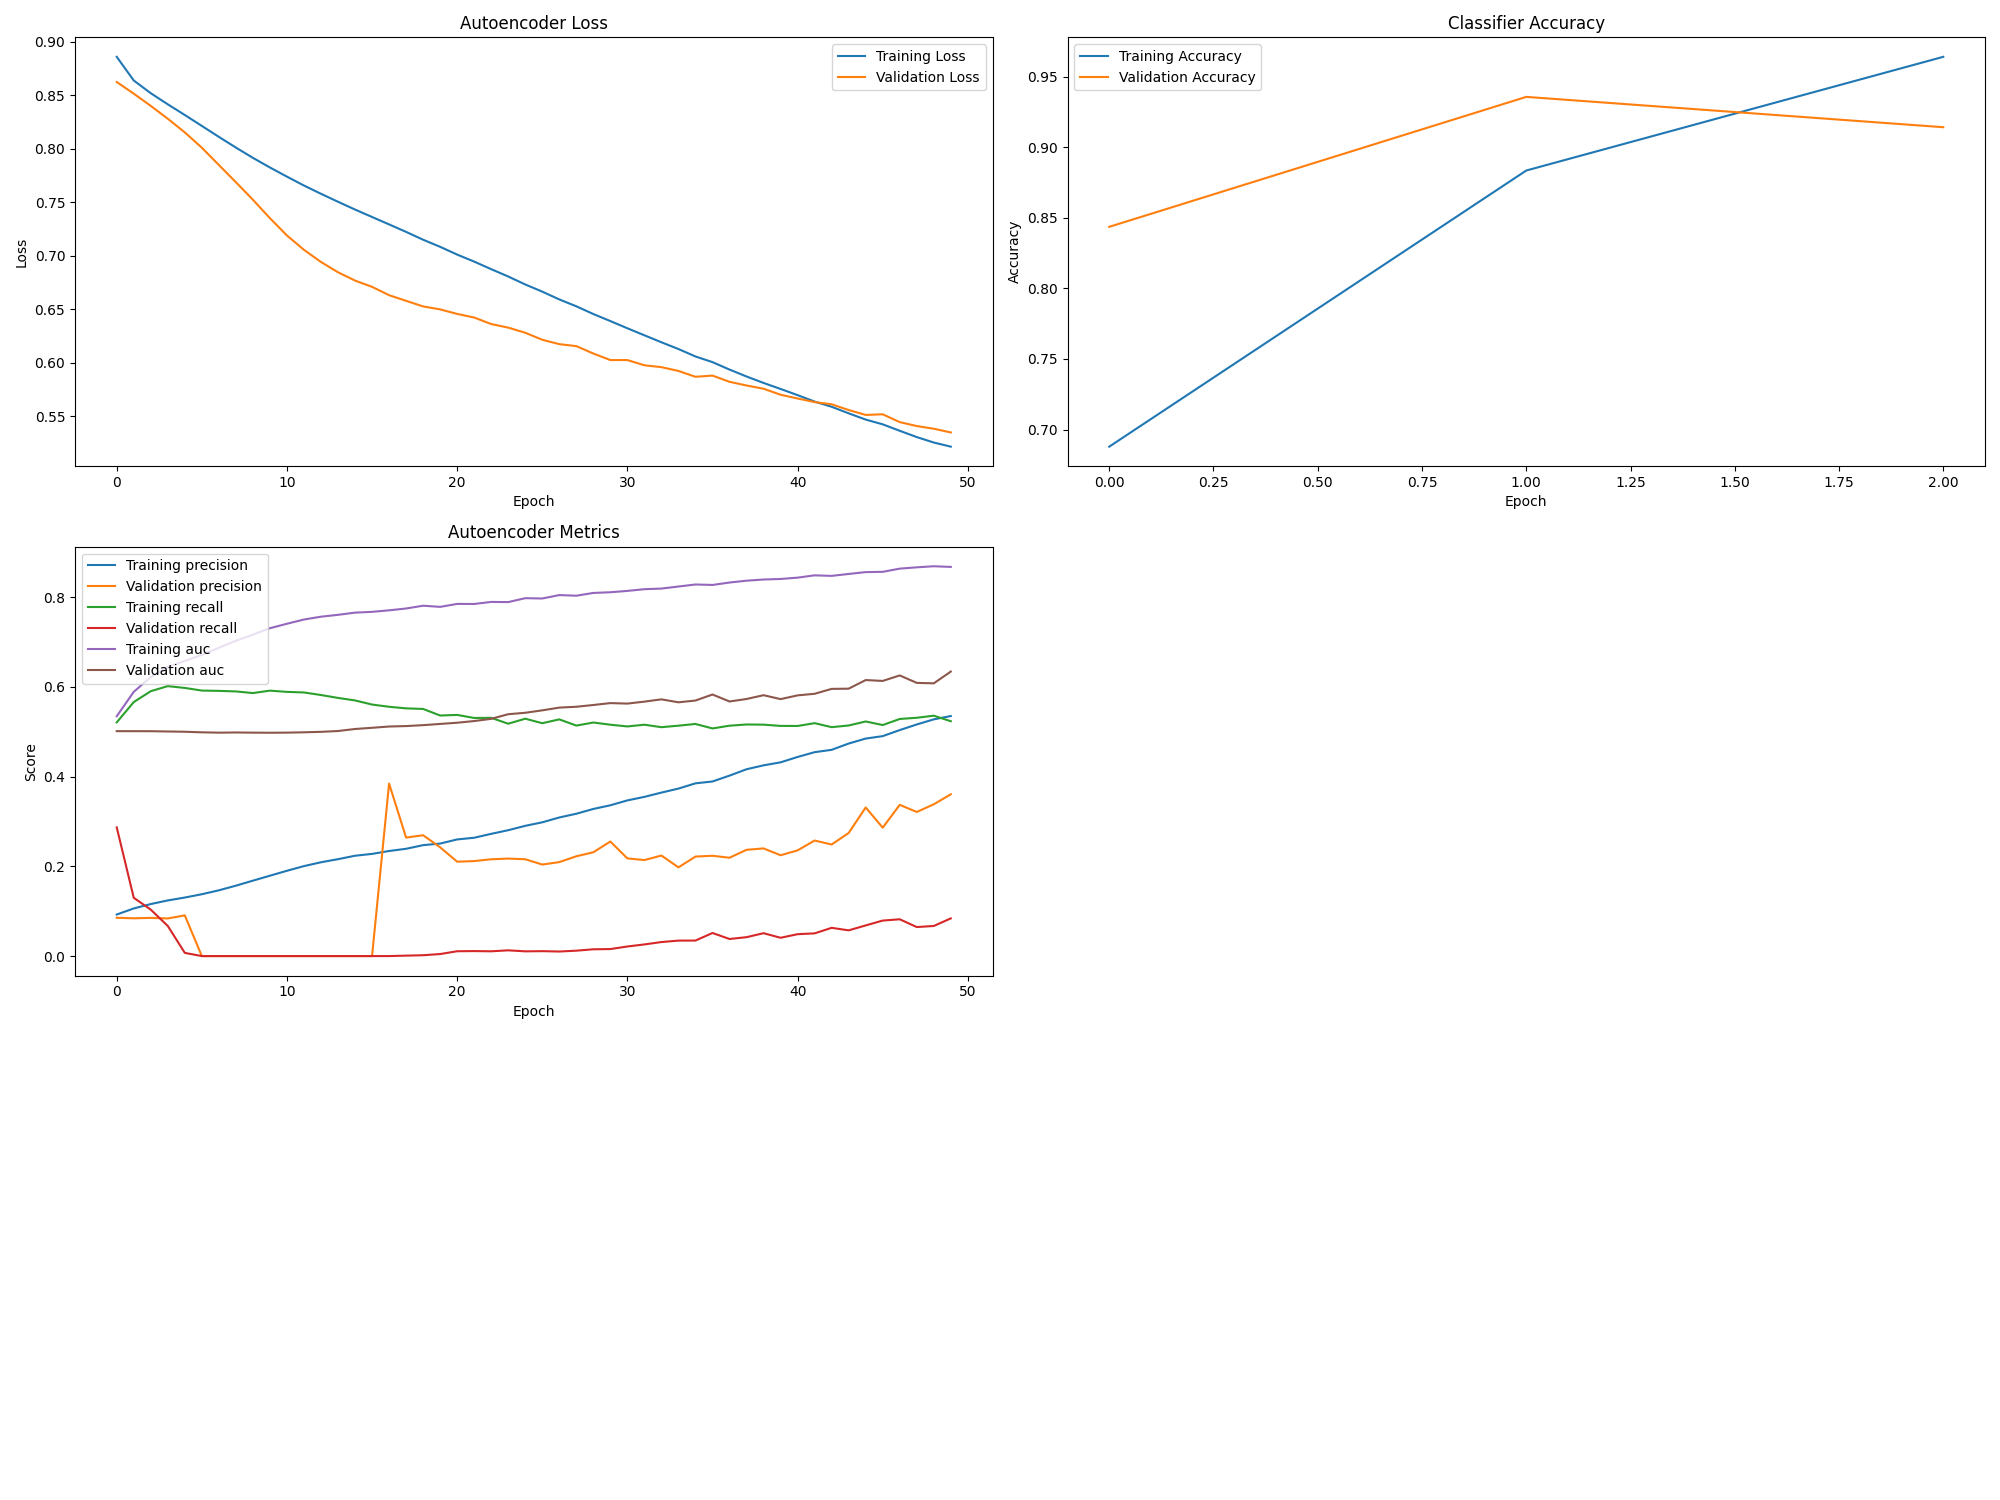

In [16]:
from google.colab.patches import cv2_imshow
import cv2
image = cv2.imread("/content/signature_model_20250218_131419/training_metrics.png")
cv2_imshow(image)

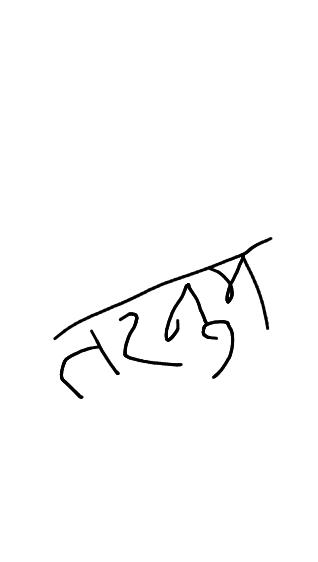

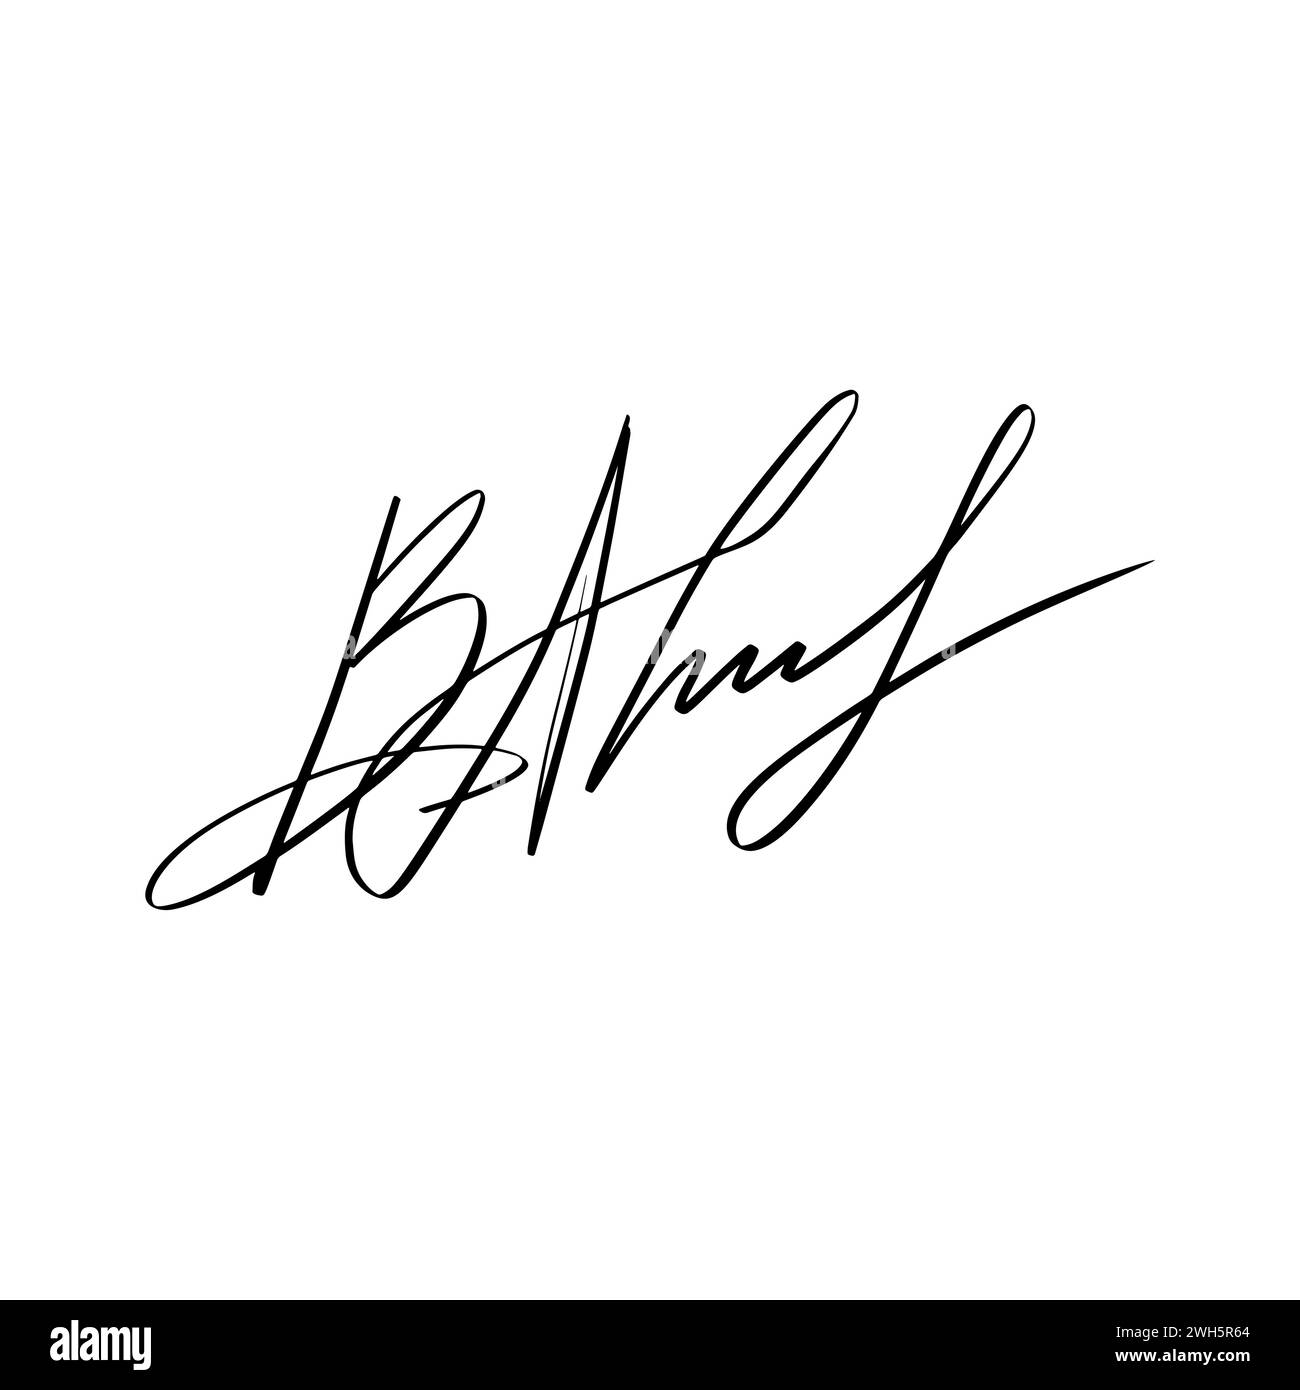

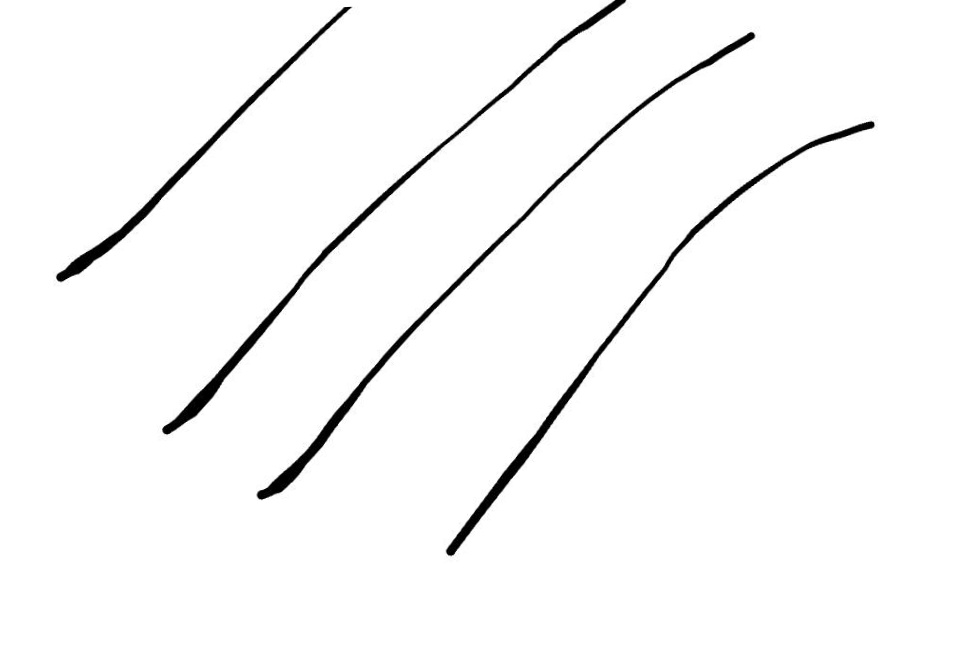

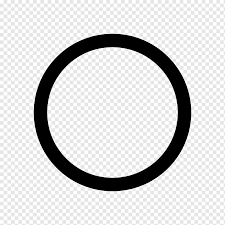

In [26]:
from google.colab.patches import cv2_imshow
import cv2
image1 = cv2.imread("/content/valid.jpg")
image2 = cv2.imread("/content/valid2.jpg")
image3 = cv2.imread("/content/invalid.jpeg")
image4 = cv2.imread("/content/invalid2.png")
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(image3)
cv2_imshow(image4)

In [17]:
model = SignatureVerificationSystem.load_model("/content/signature_model_20250218_131419") #model dir

Loading model from /content/signature_model_20250218_131419...
Model loaded successfully!


In [18]:
is_valid, details = model.verify_signature("/content/valid.jpg")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
True
{'reconstruction_error': 0.06562279909849167, 'anomaly_score': -0.3289993821252298, 'classifier_confidence': 0.8244629502296448}


In [23]:
is_valid, details = model.verify_signature("/content/valid2.jpg")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
True
{'reconstruction_error': 0.07201883941888809, 'anomaly_score': -0.3540082137878821, 'classifier_confidence': 0.8937700986862183}


In [21]:
is_valid, details = model.verify_signature("/content/invalid.jpeg")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
False
{'reconstruction_error': 0.08143296837806702, 'anomaly_score': -0.42748542953448765, 'classifier_confidence': 0.45943737030029297}


In [22]:
is_valid, details = model.verify_signature("/content/invalid2.png")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
{'reconstruction_error': 0.29568713903427124, 'anomaly_score': -0.6127992029237617, 'classifier_confidence': 0.5972728133201599}


In [28]:
is_valid, details = model.verify_signature("/content/valid3.png")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
False
{'reconstruction_error': 0.14040140807628632, 'anomaly_score': -0.43638593551747046, 'classifier_confidence': 0.9996194839477539}


In [29]:
is_valid, details = model.verify_signature("/content/invalid3.png")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
True
{'reconstruction_error': 0.09439782053232193, 'anomaly_score': -0.34263415653765306, 'classifier_confidence': 0.6281157732009888}


In [30]:
is_valid, details = model.verify_signature("/content/valid_signatures/synthetic_13_3_grid_4.png")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
True
{'reconstruction_error': 0.06946783512830734, 'anomaly_score': -0.3489853593099531, 'classifier_confidence': 0.9429299235343933}


In [31]:
is_valid, details = model.verify_signature("/content/sign_data/invalid/data (1).png")

print(is_valid)
print(details)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
False
{'reconstruction_error': 0.06969492137432098, 'anomaly_score': -0.34257508182758756, 'classifier_confidence': 0.21392852067947388}


In [33]:
# As I included lot of synthetic_valid signatures that are made with cuvres. So in case of complex signatures
# So in some complex signatures autoencoder model struggles to reconstruct it. (False Negatives)
# And when invalid curves are more like that synthetic valid data and but model reconstructs it (False positives)

In [27]:
!zip -r model.zip /content/signature_model_20250218_131419

  adding: content/signature_model_20250218_131419/ (stored 0%)
  adding: content/signature_model_20250218_131419/encoder.keras (deflated 6%)
  adding: content/signature_model_20250218_131419/parameters.json (deflated 28%)
  adding: content/signature_model_20250218_131419/anomaly_detector.joblib (deflated 78%)
  adding: content/signature_model_20250218_131419/best_autoencoder.keras (deflated 7%)
  adding: content/signature_model_20250218_131419/training_metrics.png (deflated 12%)
  adding: content/signature_model_20250218_131419/best_classifier.keras (deflated 8%)
  adding: content/signature_model_20250218_131419/classifier.keras (deflated 8%)
  adding: content/signature_model_20250218_131419/decoder.keras (deflated 7%)
  adding: content/signature_model_20250218_131419/metrics_history.json (deflated 58%)
  adding: content/signature_model_20250218_131419/autoencoder.keras (deflated 7%)
  adding: content/signature_model_20250218_131419/reconstruction_threshold.npy (deflated 47%)
